<a href="https://colab.research.google.com/github/alstm1597/ai_colab/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ●CNNの実装
Kerasを使い、CNNを実装します。  
今回はCIFAR-10というデータセットを使い、画像の分類を行います。

## ●CIFAR-10
Kerasを使い、CIFAR-10を読み込みます。  
CIFARは、約6万枚の画像にラベルをつけたたデータセットです。  
以下のコードでは、CIFAR-10を読み込み、ランダムな25枚の画像を表示します。

170500096/170498071 [==============================] - 2s 0us/step
Image size: (32, 32, 3)


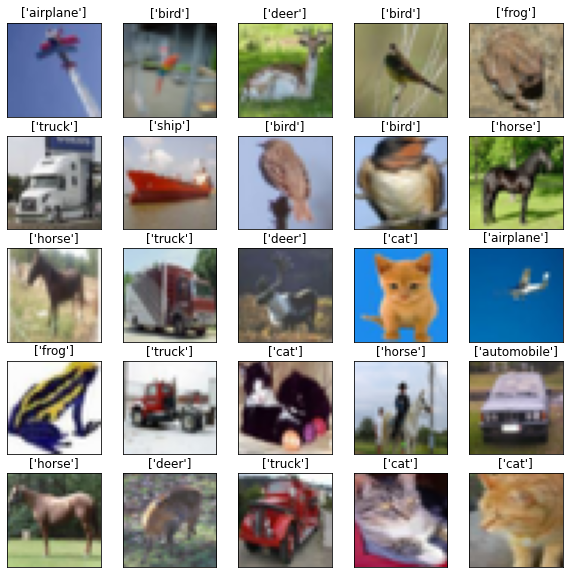

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print("Image size:", x_train[0].shape)

cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10,10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_idx[i]])
    label = cifar10_labels[t_train[rand_idx[i]]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に

plt.show()

## ●各設定
CNNの各設定を行います。  
また、ラベルをone-hot表現に変換します。  
one-hot表現は、クラスの数だけ要素のあるベクトルで、正解の値は1でそれ以外は0になります。  
例: (0 0 0 1 0 0 0 0 0 0)

In [ ]:
batch_size = 32
epochs = 20
n_class = 10  # 10のクラスに分類

# one-hot表現に変換
t_train = keras.utils.to_categorical(t_train, n_class)
t_test = keras.utils.to_categorical(t_test, n_class)
print(t_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## ●モデルの構築
CNNのモデルを構築します。  
今回は、以下の順に複数の層を並べます。  

------------------------  
畳み込み層  
畳み込み層  
Maxプーリング層  
畳み込み層  
畳み込み層  
Maxプーリング層  
全結合層  
全結合層  

------------------------  

また、中間層である全結合層の直後にドロップアウトを挟みます。  
ドロップアウトはランダムにニューロンを無効にするテクニックですが、これによりモデルの汎化性能が向上します

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
# padding='same'의 same은 0이란 뜻 주변을 0으로 감싸는거
model.add(Activation('relu'))
# 층이 많아지면 경사소실문제가 일어나기때문에 여기서 relu를 이용해 해결
model.add(Conv2D(32, (3, 3))) # 합성공층
model.add(Activation('relu')) # 활성화함수
model.add(MaxPooling2D(pool_size=(2, 2))) # 맥스풀링층

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256)) # 전결합층
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class)) # 출력층(전결합층)
model.add(Activation('softmax')) # 소프트맥스함수는 확률은 표현할 수 있어 분류문제에 적합함

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 최적화알고리즘은 아담, 손실함수는 교차엔트로피, 마지막으로 정답률의 측정까지
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)       

## ●学習
モデルを訓練します。  
学習には時間がかかりますので、編集→ノートブックの設定のハードウェアアクセラレーターでGPUを選択しましょう。

In [ ]:
x_train = x_train / 255  # 0から1の範囲に収める
x_test = x_test / 255

history = model.fit(x_train, t_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 41s 5ms/step - loss: 1.7521 - accuracy: 0.3501 - val_loss: 1.1984 - val_accuracy: 0.5751
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1306 - accuracy: 0.5996 - val_loss: 0.9295 - val_accuracy: 0.6757
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9516 - accuracy: 0.6683 - val_loss: 0.8861 - val_accuracy: 0.6920
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8257 - accuracy: 0.7088 - val_loss: 0.7867 - val_accuracy: 0.7299
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7419 - accuracy: 0.7378 - val_loss: 0.7892 - val_accuracy: 0.7287
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6806 - accuracy: 0.7606 - val_loss: 0.7298 - val_accuracy: 0.7516
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6127 - accuracy: 0.7850 - val_loss: 0.7339 - val_accuracy

## ●学習の推移
Historyには学習の経過が記録されています。  
これを使って、学習の推移を表示します。

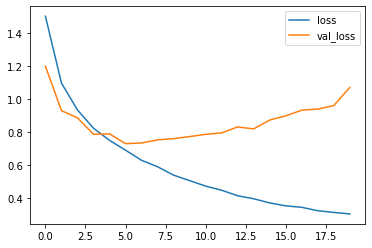

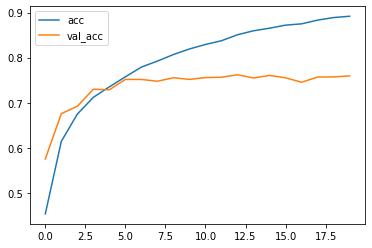

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']  # 訓練用データの誤差
train_acc = history.history['accuracy']  # 訓練用データの精度
val_loss = history.history['val_loss']  # 検証用データの誤差
val_acc = history.history['val_accuracy']  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

## ●評価
モデルの評価を行います。  

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy) #오차, 정답률

313/313 [==============================] - 1s 3ms/step - loss: 1.0703 - accuracy: 0.7595
1.0702719688415527 0.7595000267028809


## ●予測
学習済みのモデルを使って予測を行います。  

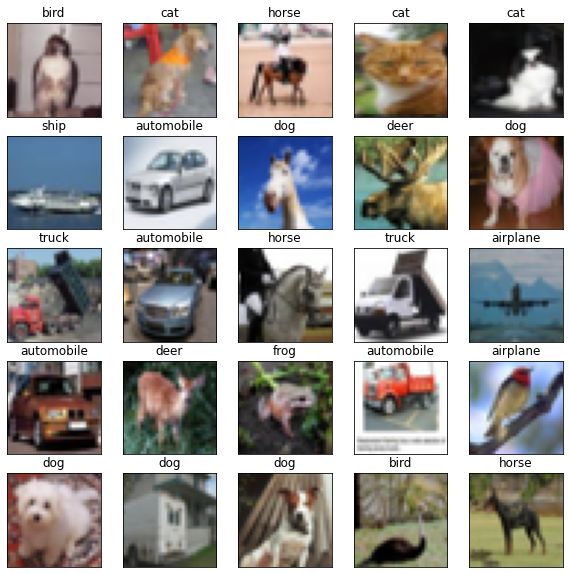

In [ ]:
n_image = 25
rand_idx = np.random.randint(0, len(x_test), n_image)

y_rand = model.predict(x_test[rand_idx])
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_idx[i]])
    label = cifar10_labels[predicted_class[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

## モデルの保存
学習済みのモデルをGoogle Driveに保存します。  

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
from keras.models import load_model

path = '/content/drive/My Drive/cnn_cifar10/'

# ディレクトリを作成　する
if not os.path.exists(path):
    os.makedirs(path)

# ファイルを保存する
model.save(path + "model_cnn_cifar10.h5")

Google Driveを開いて、モデルが保存されたことを確認しましょう。